# Data Science and Big Data Project1
## Intermediate Progress
Group 14: Honda Zhang, Jessica Zhu

**Summary:** By now, we basically finished two parts: *data collection and cleaning, finding countries sharing similar music tastes.*

**1. Data collection and cleaning**
Our current dataset has three components:
- Weekly top 200 songs from 59 countries (2017-2019): `top_songs_country.csv`
- Audio features for each song: `audio_features.csv`
- Lyrics for each song (only English songs): `lyrics.csv`

To get these datasets, we created several python files and jupyter notebooks to scrap data from Spotify API and Genius API and clean the data. We included all these files in the zip file. Below is the brief instruction of all those files:

- `top_200_songs_scrapper.py`: scraping weekly top 200 songs from 59 countries and store data from each country as a csv file separately.
- `total_rank_df.py`: read weekly top 200 songs from each country and use the total counts of each songs to re-rank songs and store the result as a csv file separtely.
- `get_track_features.py`: scraping audio features for all the songs in our dataset from Spotify API.
- `scrap_lyrics.ipynb`: scraping lyrics from Genius API.

**2. Finding countries sharing similar music tastes**
To define similarity for music taste, we tried two methods: 
- couting number of same songs in top 100 songs
- create one-hot-encoding features and clustering

To see the details of this part, please see the below cells in this notebook.

**Next Steps**:
1. Improving current methods of finding similar countries: currently we used one-hot-encoding, we might find a creative way to incorporate ranking information in the encoding part and then clustering.
2. Analysing audio features and lyrics for each group of countries: need to figure out a better way to presenting findings.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
mapping_df = pd.read_csv('region_mapping.csv', header=None)
list_of_ac = mapping_df[0].tolist()
list_of_full = mapping_df[1].tolist()
countries = list(zip(list_of_ac, list_of_full))

In [8]:
df_rank = pd.DataFrame()
for country in countries:
    file_name = 'total_rank_data/' + country[0] + '.csv'
    temp = pd.read_csv(file_name)
    famous_song_series = temp[['Track Name', 'spotify_id']][:100]
    famous_song_df = pd.DataFrame({'Name': famous_song_series['Track Name'],\
                                   'spotify_id': famous_song_series['spotify_id'],
                                   'Country': country[1]})
    df_rank = df_rank.append(famous_song_df)
df_rank.head()

,Name,spotify_id,Country
0,Crimen,3oqWr0jDWNXxWufNogGREp,Argentina
1,Creo,5Bi9Cq5oVFy1OtUgecbegZ,Argentina
2,Spaghetti del Rock,6rg1MBZqggsQ5olFGTw0rr,Argentina
3,Nunca quise,0ZAJ660VP57lLK4U7NlGOy,Argentina
4,Me Gusta,3pMo77B4r1NwwIK78lO4xf,Argentina


In [9]:
df_rank = df_rank.reset_index()
df_rank = df_rank.rename(columns = {'index':'rank'})
df_rank.head()

,rank,Name,spotify_id,Country
0,0,Crimen,3oqWr0jDWNXxWufNogGREp,Argentina
1,1,Creo,5Bi9Cq5oVFy1OtUgecbegZ,Argentina
2,2,Spaghetti del Rock,6rg1MBZqggsQ5olFGTw0rr,Argentina
3,3,Nunca quise,0ZAJ660VP57lLK4U7NlGOy,Argentina
4,4,Me Gusta,3pMo77B4r1NwwIK78lO4xf,Argentina


In [10]:
df_rank.to_csv('top_songs_country.csv')

In [11]:
country_matrix_rank = pd.DataFrame(columns=[country[1] for country in countries])

In [12]:
for country in countries:
    score_list = []
    current_temp = df_rank[df_rank['Country'] == country[1]]
    for counterparty in country_matrix_rank.iteritems():
        counterparty_temp = df_rank[df_rank['Country'] == counterparty[0]]
        temp = counterparty_temp.merge(current_temp, left_on='Name', right_on='Name')
        score_list.append(len(temp)/len(current_temp))
    country_matrix_rank.loc[country[1]] = score_list
country_matrix_rank

,Argentina,Austria,Australia,Belgium,Bolivia,Brazil,Canada,Switzerland,Chile,Colombia,...,Sweden,Singapore,Slovakia,El Salvador,Thailand,Turkey,Taiwan,United States,Uruguay,Vietnam
Argentina,1.000000,0.080000,0.090000,0.10000,0.570000,0.060000,0.080000,0.10000,0.560000,0.450000,...,0.090000,0.100000,0.070000,0.520000,0.060000,0.030000,0.080000,0.030000,0.720000,0.08000
Austria,0.080000,1.000000,0.420000,0.57000,0.090000,0.090000,0.370000,0.60000,0.070000,0.080000,...,0.460000,0.260000,0.430000,0.140000,0.140000,0.070000,0.160000,0.250000,0.060000,0.23000
Australia,0.090000,0.420000,1.020000,0.58000,0.110000,0.140000,0.660000,0.49000,0.100000,0.110000,...,0.460000,0.360000,0.400000,0.180000,0.220000,0.080000,0.210000,0.520000,0.070000,0.25000
Belgium,0.100000,0.570000,0.580000,1.02000,0.120000,0.130000,0.470000,0.70000,0.100000,0.140000,...,0.510000,0.410000,0.530000,0.210000,0.210000,0.100000,0.220000,0.330000,0.100000,0.31000
Bolivia,0.570000,0.090000,0.110000,0.12000,1.000000,0.080000,0.100000,0.13000,0.570000,0.630000,...,0.090000,0.130000,0.090000,0.710000,0.090000,0.050000,0.080000,0.070000,0.660000,0.10000
Brazil,0.060000,0.090000,0.140000,0.13000,0.080000,1.000000,0.120000,0.11000,0.040000,0.060000,...,0.110000,0.130000,0.100000,0.100000,0.080000,0.060000,0.080000,0.090000,0.060000,0.12000
Canada,0.080000,0.370000,0.660000,0.47000,0.100000,0.120000,1.000000,0.45000,0.080000,0.120000,...,0.370000,0.310000,0.370000,0.180000,0.200000,0.100000,0.200000,0.790000,0.070000,0.23000
Switzerland,0.100000,0.600000,0.490000,0.70000,0.130000,0.110000,0.450000,1.02000,0.110000,0.120000,...,0.510000,0.330000,0.510000,0.200000,0.160000,0.100000,0.190000,0.320000,0.100000,0.26000
Chile,0.560000,0.070000,0.100000,0.10000,0.570000,0.040000,0.080000,0.11000,1.000000,0.530000,...,0.080000,0.070000,0.040000,0.550000,0.050000,0.040000,0.070000,0.050000,0.560000,0.05000
Colombia,0.450000,0.080000,0.110000,0.14000,0.630000,0.060000,0.120000,0.12000,0.530000,1.000000,...,0.090000,0.130000,0.080000,0.630000,0.070000,0.050000,0.100000,0.070000,0.470000,0.09000


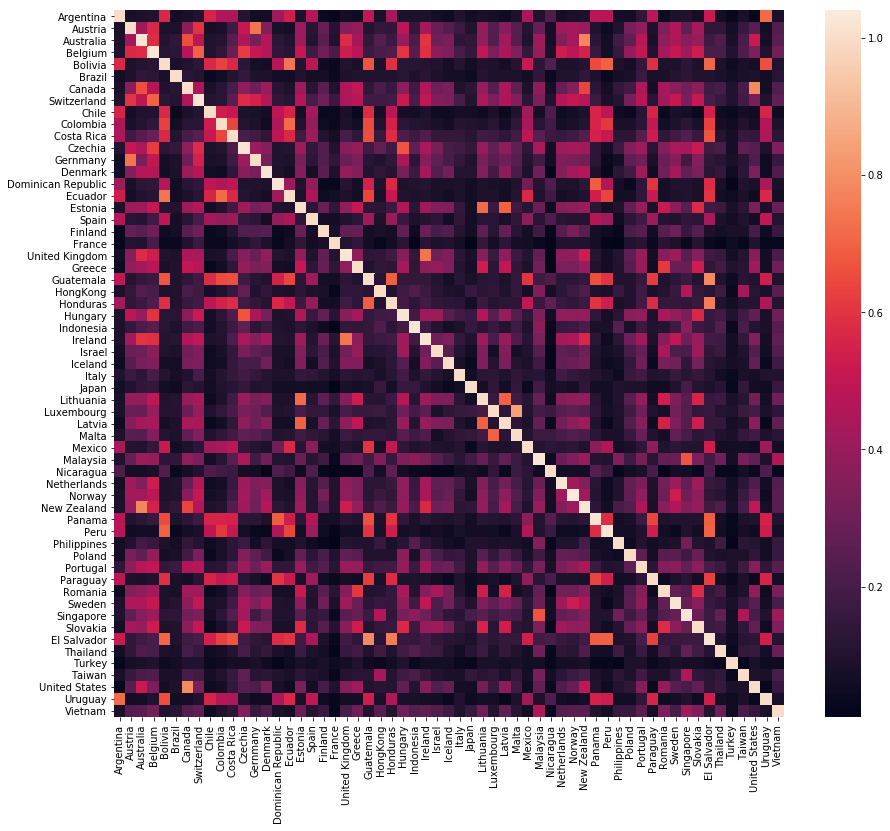

In [23]:
plt.figure(figsize = (15,13))
sns.heatmap(country_matrix_rank)

From this plot, we can see that some of the countries share similar music tastes. However, it's hard to use the result to group similar countries. Therefore, we tried to use clustering method the find the similar countries.

df_rank.head(10)

# Clustering

In [13]:
# first use one-hot-encoding to create features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [14]:
ohe_features = enc.fit_transform(np.array(df_rank['Name']).reshape(-1,1)).toarray()

In [15]:
df_ohe = pd.DataFrame(ohe_features)

In [16]:
df_ohe['Country'] = df_rank.reset_index()['Country']

In [17]:
# sum ohe features by country
df_ohe = df_ohe.groupby('Country').sum()

In [18]:
df_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init=1000, random_state = 0)
kmeans.fit_transform(df_ohe)

array([[11.34258881,  7.11182993, 11.103209  , 10.26294914, 11.82433147],
       [ 6.6490508 , 11.65453238,  9.63230242,  9.92865172,  8.77707451],
       [ 7.17935999, 11.76129776, 10.29714766,  9.86550176,  8.81497043],
       [ 6.19039479, 11.42160781,  9.5279195 ,  9.38499467,  7.7983854 ],
       [11.19468569,  5.50709769, 10.91014436, 10.12808595, 11.60619247],
       [11.20460664, 11.97197248, 10.88720579,  9.21021851, 11.70628195],
       [ 7.17935999, 11.62768786,  9.81230095,  9.8401283 ,  8.5591623 ],
       [11.36216377,  6.79728806, 11.29297348, 10.27512165, 11.98301267],
       [11.21947161,  6.43841013, 10.94446207, 10.07859737, 11.71102678],
       [10.28423221,  6.58241027, 10.3092798 ,  9.77640655, 10.98652373],
       [ 7.48248985, 11.56300675,  9.24831066,  9.76361229,  8.5591623 ],
       [ 7.85909868, 12.01886538, 10.34559085, 10.25076217,  9.43594389],
       [11.23926099,  7.3961561 , 11.1144613 , 10.35992881, 11.78668426],
       [11.25901559,  6.08918098, 11.1

In [37]:
kmeans_cluster_assignments = kmeans.labels_

In [38]:
df_ohe['Cluster'] = kmeans_cluster_assignments

In [39]:
df_ohe['Cluster'].value_counts()

0    18
1    16
4     9
3     8
2     8
Name: Cluster, dtype: int64

In [40]:
df_ohe.groupby('Cluster').get_group(0).index

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'Gernmany', 'Ireland', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [41]:
df_ohe.groupby('Cluster').get_group(1).index

Index(['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
       'Mexico', 'Panama', 'Paraguay', 'Peru', 'Spain', 'Uruguay'],
      dtype='object', name='Country')

In [42]:
df_ohe.groupby('Cluster').get_group(2).index

Index(['HongKong', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore',
       'Taiwan', 'Thailand', 'Vietnam'],
      dtype='object', name='Country')

In [43]:
df_ohe.groupby('Cluster').get_group(3).index

Index(['Brazil', 'France', 'Italy', 'Japan', 'Luxembourg', 'Malta',
       'Nicaragua', 'Turkey'],
      dtype='object', name='Country')

In [44]:
df_ohe.groupby('Cluster').get_group(4).index

Index(['Estonia', 'Greece', 'Hungary', 'Iceland', 'Israel', 'Latvia',
       'Lithuania', 'Romania', 'Slovakia'],
      dtype='object', name='Country')

In [86]:
group_0 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(0).index))]
group_1 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(1).index))]
group_2 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(2).index))]
group_3 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(3).index))]
group_4 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(4).index))]

In [87]:
group_0.head()

,rank,Name,spotify_id,Country
100,0,Ohne mein Team,05Mp2UJulSttxQ4E6hQPH3,Austria
101,1,Palmen aus Plastik,6wHRm1KR8pzVDPdmR6Qovj,Austria
102,2,Shape of You,7qiZfU4dY1lWllzX7mPBI3,Austria
103,3,Primo,7y5chiQbuvviOYUfUmOPqo,Austria
104,4,Believer,0CcQNd8CINkwQfe1RDtGV6,Austria


# Analysis Track Features

In [61]:
track_features = pd.read_csv('audio_features.csv')

In [62]:
track_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.799,0.722,7,-5.051,1,0.0387,0.35900,0.000000,0.178,0.880,128.012,audio_features,2EhvCzRw0C7anZHsj284oX,spotify:track:2EhvCzRw0C7anZHsj284oX,https://api.spotify.com/v1/tracks/2EhvCzRw0C7a...,https://api.spotify.com/v1/audio-analysis/2Ehv...,176906,4
1,1,0.553,0.964,0,-6.710,1,0.0568,0.00221,0.017600,0.060,0.530,133.935,audio_features,6BI4NrjNsQfac2erXVjSVf,spotify:track:6BI4NrjNsQfac2erXVjSVf,https://api.spotify.com/v1/tracks/6BI4NrjNsQfa...,https://api.spotify.com/v1/audio-analysis/6BI4...,220177,4
2,2,0.668,0.816,9,-3.708,0,0.0322,0.03110,0.000025,0.195,0.550,129.975,audio_features,3CZoTwEuhvrokhej4VAo0Q,spotify:track:3CZoTwEuhvrokhej4VAo0Q,https://api.spotify.com/v1/tracks/3CZoTwEuhvro...,https://api.spotify.com/v1/audio-analysis/3CZo...,253027,4
3,3,0.547,0.881,4,-5.994,0,0.3100,0.11100,0.000000,0.386,0.440,86.628,audio_features,7CbkW1lLxOM5D6YWTnzknv,spotify:track:7CbkW1lLxOM5D6YWTnzknv,https://api.spotify.com/v1/tracks/7CbkW1lLxOM5...,https://api.spotify.com/v1/audio-analysis/7Cbk...,166486,4
4,4,0.639,0.745,0,-3.631,1,0.0416,0.11000,0.000000,0.131,0.356,139.993,audio_features,4ffYbqNOSn01NHOmQGJEKT,spotify:track:4ffYbqNOSn01NHOmQGJEKT,https://api.spotify.com/v1/tracks/4ffYbqNOSn01...,https://api.spotify.com/v1/audio-analysis/4ffY...,193948,4


In [88]:
group_0_audio = pd.merge(group_0, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_1_audio = pd.merge(group_1, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_2_audio = pd.merge(group_2, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_3_audio = pd.merge(group_3, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_4_audio = pd.merge(group_4, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')

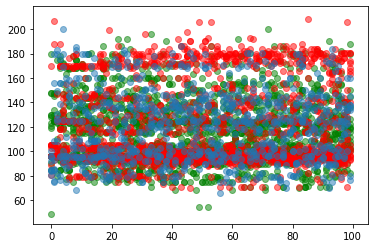

In [95]:
plt.scatter(group_0_audio['rank'], group_0_audio['tempo'], color = 'green', alpha = 0.5)
plt.scatter(group_1_audio['rank'], group_1_audio['tempo'], color = 'red', alpha = 0.5)
plt.scatter(group_2_audio['rank'], group_2_audio['tempo'], alpha = 0.5)